In [1]:
# # Mount GDrive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras import layers, optimizers, callbacks

#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preproc_res


import matplotlib.pyplot as plt

#Put Colab in the context of this challenge
import os

In [3]:
pwd

'/Users/karimelbana/SolarOdyssey/rrep-nigeria'

In [4]:
#os.chdir("drive/MyDrive/SolarOdyssey/rrep_nigeria")

In [5]:
pwd

'/Users/karimelbana/SolarOdyssey/rrep-nigeria'

In [7]:
df_masked_cat = pd.read_csv('df_masked_cat.csv')
df_masked_cat.head(5)

,Unnamed: 0.1,Unnamed: 0,index,Id,Lon,Lat,Country,State,LGA,Ward,...,Generator capacity (kw),PV size(kW),Battery capacity (kWh),Demand,Electr_type_phase_1,Electr_type_phase_2,Electr_type_phase_3,Distance_m,demand_cat_4,demand_cat_2
0,0,1654.0,146.0,40733,4.742796,13.004795,Nigeria,Sokoto,Silame,MARAFA WEST,...,194.0,196.0,448.0,279.0,none,grid,grid,3870.0,4,1
1,1,954.0,250.0,38729,8.794116,9.100529,Nigeria,Plateau,Bokkos,TOFF,...,151.0,160.0,352.0,209.0,none,mini-grid,intercon,36750.0,4,1
2,2,1139.0,435.0,39400,9.598031,8.457592,Nigeria,Plateau,Shendam,AZARA,...,147.0,188.0,392.0,210.0,mini-grid,mini-grid,intercon,37260.0,4,1
3,3,1338.0,90.0,34201,4.450469,6.988445,Nigeria,Ogun,Ijebu East,OSUN,...,124.0,136.0,312.0,178.0,none,none,grid,41620.0,3,1
4,4,92.0,92.0,10451,9.020765,6.159864,Nigeria,Cross River,Boki,ABO,...,261.0,326.0,664.0,361.0,none,mini-grid,intercon,20970.0,4,1


In [8]:
from os import walk

data_path = './data/initial_set'

f = []
for (dirpath, dirnames, filenames) in walk(data_path):
    f.extend(filenames)
    break

In [9]:
images_ids = []
for id in filenames:
  id = int(id.strip('.png'))
  images_ids.append(id)

#images_ids

In [59]:
y = []
for id in images_ids:
  #print(id)
  y.append(int(df_masked_cat[df_masked_cat['Id'] == id].demand_cat_2.values[0]))
len(y)

In [61]:
# y_new=[]

# for el in y:
#   if el == 2:
#     el = 0
#   elif el == 3:
#     el = 1
#   else:
#     el = 2
#   y_new.append(el)

In [62]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#encoder = LabelEncoder()
#encoder.fit(y)
#y_cat = to_categorical(encoder.transform(y))
y_cat = to_categorical(y)

In [64]:
def load_sattelite_images(data_path, data_folder, y):
        
    data_path = data_path
    y = np.array(y)
    imgs = []
    images_path = [os.path.join(data_folder, elt) for elt in os.listdir(os.path.join(data_path)) if elt.find('.png')>0]
    #print(images_path)    
    
    for path in images_path:
        if os.path.exists(path):
            image = Image.open(path)
            #image = image.resize((256, 256))
            imgs.append(np.array(image))

    X = np.array(imgs)
    #print(X.shape)

    # first_split = int(len(imgs) * .6)
    # second_split = first_split + int(len(imgs) * 0.2)

    X_train, X_sub, y_train, y_sub = train_test_split(X, y, test_size=0.40, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_sub, y_sub, test_size=0.20, random_state=42)

    # #X_train, X_val, X_test = X[:first_split], X[first_split:second_split], X[second_split:]
    # #y_train, y_val, y_test = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [65]:
pwd

'/Users/karimelbana/SolarOdyssey/rrep-nigeria'

In [66]:
data_path = './data/initial_set'
data_folder = 'data/initial_set'
X_train, y_train, X_val, y_val, X_test, y_test = load_sattelite_images(data_path, data_folder, y_cat)

In [67]:
X_train.shape, np.array(y_train).shape, X_val.shape, np.array(y_val).shape, X_test.shape, np.array(y_test).shape

((779, 512, 512, 3),
 (779, 2),
 (416, 512, 512, 3),
 (416, 2),
 (104, 512, 512, 3),
 (104, 2))

In [71]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [21]:
#plt.imshow(X_train[0])

In [22]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(9):
#   #for j in range(3):
#     #plt.subplot(9,3, j+1 + 3*i)
#     #plt.imshow(X_train[i])
#     plt.subplot(9,1, i+1)
#     plt.imshow(X_train[i])

In [23]:
# #plot images
# plt.figure(figsize=(20,15))
# for i in range(2):
#   for j in range(2):
#     plt.subplot(8,2,j+2*i+1)
#     plt.imshow(X_train[i][:,:,j], cmap='gray')

In [24]:
#X_train[0].shape

In [25]:
#np.unique(y)

In [72]:
#Preprocess to match VGG16 or resnet50

model_selected = 'vgg16'

if model_selected == 'vgg16':
  X_train = preprocess_input(X_train) 
  X_val = preprocess_input(X_val)
  X_test = preprocess_input(X_test)

elif model_selected == 'resnet50':
  X_train = preproc_res(X_train) 
  X_val = preproc_res(X_val)
  X_test = preproc_res(X_test)


In [76]:
np.unique(y_val)

array([0., 1.], dtype=float32)

In [27]:
#load model
def load_model(model_selected):

    model = Sequential()

    if model_selected == 'vgg16':
      model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    elif model_selected == 'resnet50':
      model = ResNet50(weights='imagenet', include_top = False, input_shape=X_train[0].shape)
    
    print(model.summary())

    return model

In [28]:
def set_nontrainable_layers(model):
    
  # Set the first layers to be untrainable
  model.trainable = False
        
  return model

In [105]:
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = set_nontrainable_layers(model)    
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(30, activation='relu')
    prediction_layer = layers.Dense(2, activation='softmax')
    
    model_w_layers = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
  
    return model_w_layers

In [106]:
from sklearn.metrics import f1_score

def my_metric_fn(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    return f1

In [107]:
def build_model(model_selected):
  
  model = load_model(model_selected)
  model_full = add_last_layers(model)
    
  #opt = optimizers.Adam(learning_rate=1e-4)

  model_full.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    
  return model_full

In [108]:
#base_model = load_model(model_selected)

In [109]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    validation_split=0.2)

In [110]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(X_train)

In [111]:
model = Sequential()

#model = load_model(model_selected)
#model.summary()

model_built = build_model(model_selected)
model_built.summary()

es = EarlyStopping(patience = 10, 
                   verbose = 1, 
                   restore_best_weights = True)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [112]:
np.unique(y_val)

array([0., 1.], dtype=float32)

In [113]:
pd.DataFrame(y).value_counts()

0    1091
1     208
dtype: int64

In [114]:
#class_weights = {0: 0.46, 1: 0.45}

In [115]:
#history = model_built.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=50, batch_size=16, callbacks=[es])

In [116]:
type(y_cat)

numpy.ndarray

In [117]:
es

In [118]:
y_train.shape

(779, 2)

In [119]:
y_val.shape

(416, 2)

In [120]:
X_train.shape

(779, 512, 512, 3)

In [121]:
X_val.shape

(416, 512, 512, 3)

In [122]:
history = model_built.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, callbacks=[es])

Epoch 1/50
49/49 [==============================] - 753s 15s/step - loss: 2.3996 - accuracy: 0.7651 - val_loss: 1.8297 - val_accuracy: 0.8534
Epoch 2/50
49/49 [==============================] - 812s 17s/step - loss: 0.5333 - accuracy: 0.9217 - val_loss: 1.4184 - val_accuracy: 0.8534
Epoch 3/50
49/49 [==============================] - 782s 16s/step - loss: 0.1555 - accuracy: 0.9589 - val_loss: 1.4763 - val_accuracy: 0.8486
Epoch 4/50
49/49 [==============================] - 811s 17s/step - loss: 0.0929 - accuracy: 0.9705 - val_loss: 1.4396 - val_accuracy: 0.8389
Epoch 5/50
49/49 [==============================] - 793s 16s/step - loss: 0.0571 - accuracy: 0.9936 - val_loss: 1.5340 - val_accuracy: 0.8510
Epoch 6/50
49/49 [==============================] - 823s 17s/step - loss: 0.0313 - accuracy: 0.9949 - val_loss: 1.5926 - val_accuracy: 0.8221
Epoch 7/50
49/49 [==============================] - 822s 17s/step - loss: 0.0221 - accuracy: 0.9961 - val_loss: 1.6822 - val_accuracy: 0.8438
Epoch 

KeyboardInterrupt: 

In [ ]:
'=IF(S2<60, 0, IF(ISBETWEEN(S2, 60,120), 1, IF(ISBETWEEN(S2, 120,200), 2, 3)))'

In [ ]:
history.history

{'loss': [36719.55078125,
  8337.2978515625,
  8522.955078125,
  1403.4173583984375,
  1994.6375732421875,
  2051.4140625,
  330.2071838378906,
  135.98281860351562,
  129.2735137939453,
  160.33724975585938,
  77.3999252319336,
  51.192840576171875,
  78.76077270507812,
  133.07174682617188,
  11.509093284606934,
  87.23123931884766],
 'mse': [36719.55078125,
  8337.2978515625,
  8522.955078125,
  1403.4173583984375,
  1994.6375732421875,
  2051.4140625,
  330.2071838378906,
  135.98281860351562,
  129.2735137939453,
  160.33724975585938,
  77.3999252319336,
  51.192840576171875,
  78.76077270507812,
  133.07174682617188,
  11.509093284606934,
  87.23123931884766],
 'val_loss': [831.1284790039062,
  7318.6240234375,
  3390.648193359375,
  303.648193359375,
  1097.3468017578125,
  647.0031127929688,
  281.84063720703125,
  388.497802734375,
  342.7603454589844,
  312.82476806640625,
  273.7745361328125,
  279.1624450683594,
  327.2934265136719,
  312.882568359375,
  280.2222595214844,


In [ ]:
print(model_built.evaluate(X_test, y_test, verbose=1))

1/1 [==============================] - 0s 233ms/step - loss: 1999.8970 - mse: 1999.8970
[1999.89697265625, 1999.89697265625]


In [ ]:
test = np.expand_dims(X_test[1], axis=0)

In [ ]:
test.shape

(1, 256, 256, 3)

In [ ]:
model_built.predict(test)

1/1 [==============================] - 0s 24ms/step


array([[157.56335]], dtype=float32)

In [ ]:
X_train.shape

(6, 256, 256, 3)

In [ ]:
X_val.shape

(2, 256, 256, 3)

In [ ]:
# def predictImage(url, model):
  
#   # Takes an imafe and a model
  
#   img = getImage(url)
#   img = img_to_array(img)
#   img = img.reshape((-1, 150, 150, 3))
#   res = model.predict(img)[0][0]
#   if(res < 0.5):
#     animal = "cat"
#     prob = 1-res
#   if(res >= 0.5):
#     animal = "dog"
#     prob = res
    
#   print("Animal : ", animal)
#   print("probability = ",prob)

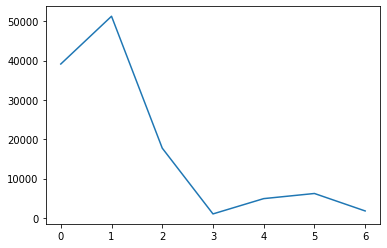

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

1/1 [==============================] - 1s 985ms/step - loss: 38908.8164
38908.81640625


In [ ]:
res_vgg = model_built.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accurcy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

1/1 [==============================] - 0s 80ms/step - loss: 2848.9688 - mse: 2848.9688
test_accuracy_vgg = 284897.0 %


NameError: ignored

In [ ]:
# #ternausnet
# pip install torch torchvision
# pip install opencv-python
# pip install ternausnet

In [ ]:
# %matplotlib inline
# from pylab import *
# #from skimage.morphology import watershed
# import scipy.ndimage as ndimage
# from PIL import Image, ImagePalette

# from torch.nn import functional as F
# from torchvision.transforms import ToTensor, Normalize, Compose
# import torch

# import tifffile as tiff
# import cv2
# import random
# from pathlib import Path

#from models.ternausnet2 import TernausNetV2